# 0. Install and Import Dependencies

In [1]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiohttp-retry                 2.8.3
aiosignal                     1.3.1
altair                        5.3.0
annotated-types               0.7.0
anyio                         3.6.2
api                           0.0.7
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asgiref                       3.7.2
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.2.0
audioread                     3.0.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bitsandbytes                  0.43.3
bleach                        6.0.0
blinker                       1.6.3
blis                          0.7.11
cachetools                    5.3.1
catalogue    

DEPRECATION: Loading egg at c:\users\omkar\appdata\local\programs\python\python311\lib\site-packages\lipnet-0.1.6-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
!pip install opencv-python matplotlib imageio gdown tensorflow

DEPRECATION: Loading egg at c:\users\omkar\appdata\local\programs\python\python311\lib\site-packages\lipnet-0.1.6-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [6]:
import gdown

In [7]:
l = 'C:/Users/omkar/Lip Reading/data.zip'
output = 'data.zip'
gdown.extractall('data.zip')

['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [8]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [9]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [10]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [11]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [12]:
char_to_num(['o','m','k','a','r'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([15, 13, 11,  1, 18], dtype=int64)>

In [13]:
num_to_char([15,  13,  11, 1, 18])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'o', b'm', b'k', b'a', b'r'], dtype=object)>

In [14]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [15]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    # File name extraction (Windows style)
    file_name = os.path.splitext(os.path.basename(path))[0]  # Using os.path to ensure platform independence
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    
    # Check if the files exist before loading
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"Video file not found: {video_path}")
    if not os.path.exists(alignment_path):
        raise FileNotFoundError(f"Alignment file not found: {alignment_path}")

    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments


In [16]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [17]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [18]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

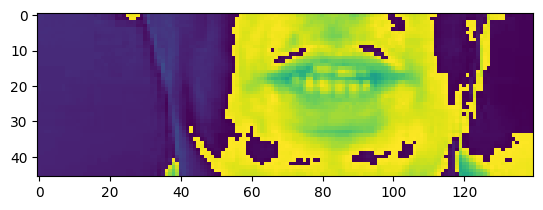

In [19]:
plt.imshow(frames[40])

In [20]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [21]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [22]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [23]:
from matplotlib import pyplot as plt

In [24]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [25]:
len(test)

50

In [26]:
frames, alignments = next(data.as_numpy_iterator())

In [27]:
len(frames)

2

In [28]:
test = data.as_numpy_iterator()

In [29]:
val = test.next(); val[0]

array([[[[[1.2259306 ],
          [1.2259306 ],
          [1.2259306 ],
          ...,
          [0.26817232],
          [0.26817232],
          [0.26817232]],

         [[1.0726893 ],
          [1.1109996 ],
          [1.1876203 ],
          ...,
          [0.26817232],
          [0.26817232],
          [0.26817232]],

         [[0.91944796],
          [1.0726893 ],
          [0.91944796],
          ...,
          [0.30648264],
          [0.26817232],
          [0.26817232]],

         ...,

         [[1.1876203 ],
          [1.1876203 ],
          [1.1876203 ],
          ...,
          [0.11493099],
          [0.07662066],
          [0.07662066]],

         [[1.14931   ],
          [1.14931   ],
          [1.14931   ],
          ...,
          [0.11493099],
          [0.07662066],
          [0.07662066]],

         [[1.14931   ],
          [1.14931   ],
          [1.14931   ],
          ...,
          [0.11493099],
          [0.07662066],
          [0.07662066]]],


        [[[1.1493

In [30]:
#imageio.mimsave('./animation.gif', val[0][0], fps=10)

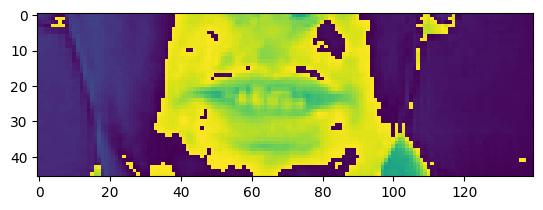

In [31]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][35])

In [32]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place white by k three again'>

# 3. Design the Deep Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [34]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [35]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [37]:
5*17*75

6375

In [38]:
yhat = model.predict(val[0])

1/1 [==============================] - 24s 24s/step


In [39]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'zzpppppppppppppppppppppppppppppppppzzzzzzzzzzzzzzzzzzzzzzzzzzllllllllllannn'>

In [40]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'zzpppppppppppppppppppppppppppppppppzzzzzzzzzzzzzzzzzzzzzzzzzzllllllllllannn'>

In [41]:
model.input_shape

(None, 75, 46, 140, 1)

In [42]:
model.output_shape

(None, 75, 41)

# 5. Make a Prediction

In [51]:
model.load_weights('./models/checkpoint')  # Path to pre-trained weights

# 6. Make a Prediction
test_sample = next(iter(test))  # Sample batch for testing
sample_frames, sample_alignments = test_sample[0][0], test_sample[1][0]

yhat = model.predict(tf.expand_dims(sample_frames, axis=0))
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

# Display Results
print("REAL TEXT")
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample_alignments]])

print("PREDICTIONS")
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded])

1/1 [==============================] - 3s 3s/step
REAL TEXT
[<tf.Tensor: shape=(), dtype=string, numpy=b'set green in v one soon'>]
PREDICTIONS
[<tf.Tensor: shape=(), dtype=string, numpy=b'set green in v one soon'>]


In [53]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set green in v one soon'>]

# Test on a Video

In [54]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [55]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [56]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 3s 3s/step


In [57]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [58]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from nltk.translate.bleu_score import sentence_bleu
import tensorflow as tf
import numpy as np

# 1. Prepare predictions and ground truth
y_true_texts = []
y_pred_texts = []

for test_sample in test:  # Loop through each batch in your test set
    sample_frames, sample_alignments = test_sample[0], test_sample[1]
    
    # Get model predictions
    yhat = model.predict(tf.expand_dims(sample_frames[0], axis=0))
    decoded_pred = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()
    
    # Decode real text and predictions to readable format
    real_text = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample_alignments]
    pred_text = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded_pred]
    
    y_true_texts.append(real_text[0].numpy().decode('utf-8'))
    y_pred_texts.append(pred_text[0].numpy().decode('utf-8'))


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
Accuracy: 0.9136546184738956
BLEU Score: 0.9260101564271712
Precision: 0.9136546184738956
Recall: 0.9136546184738956
F1 Score: 0.9136546184738956
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]


C:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


ValueError: invalid literal for int() with base 10: 'bin blue by z nine soon'

In [65]:
# 2. Accuracy
accuracy = accuracy_score(y_true_texts, y_pred_texts)
print("Accuracy:", accuracy)

# 3. BLEU Score
bleu_scores = [sentence_bleu([true.split()], pred.split()) for true, pred in zip(y_true_texts, y_pred_texts)]
average_bleu_score = np.mean(bleu_scores)
print("BLEU Score:", average_bleu_score)

# 4. Precision, Recall, F1
precision = precision_score(y_true_texts, y_pred_texts, average='micro')
recall = recall_score(y_true_texts, y_pred_texts, average='micro')
f1 = f1_score(y_true_texts, y_pred_texts, average='micro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_true_texts, y_pred_texts)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9136546184738956
BLEU Score: 0.9260101564271712
Precision: 0.9136546184738956
Recall: 0.9136546184738956
F1 Score: 0.9136546184738956
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]


C:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [61]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from sklearn.metrics import accuracy_score
import numpy as np
import editdistance

# Edit Distance (Levenshtein Distance)
edit_distances = [editdistance.eval(true, pred) for true, pred in zip(y_true_texts, y_pred_texts)]
average_edit_distance = np.mean(edit_distances)
print("Average Edit Distance:", average_edit_distance)

# BLEU Score with Smoothing
smooth = SmoothingFunction().method1
bleu_scores = [sentence_bleu([true.split()], pred.split(), smoothing_function=smooth) for true, pred in zip(y_true_texts, y_pred_texts)]
average_bleu_score = np.mean(bleu_scores)
print("Smoothed BLEU Score:", average_bleu_score)


Average Edit Distance: 0.142570281124498
Smoothed BLEU Score: 0.942680044888201


In [ ]:
# LipNet Inference with Pre-Trained Weights.ipynb

# 1. Install and Import Dependencies
!pip install opencv-python matplotlib imageio gdown tensorflow

import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

# Limit memory growth to avoid resource exhaustion
tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 2. Build Data Loading Functions
import gdown

path = 'C:/Users/omkar/Lip Reading/data.zip'
output = 'data.zip'
gdown.extractall('data.zip')

def load_video(path: str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236, 80:220, :])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

# Define vocabulary and mappings
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

def load_alignments(path: str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens, ' ', line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = os.path.splitext(os.path.basename(path))[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')

    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

# 3. Create Data Pipeline
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(lambda x: tf.py_function(load_data, [x], (tf.float32, tf.int64)))
data = data.padded_batch(2, padded_shapes=([75, None, None, None], [40]))
data = data.prefetch(tf.data.AUTOTUNE)

train = data.take(450)
test = data.skip(450)

# 4. Design the Deep Neural Network (LipNet model)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, TimeDistributed, Flatten

model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))
model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))
model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))
model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))
model.summary()

# 5. Load Pre-trained Weights for Inference
!gdown https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y -O pretrained_weights.zip
!unzip pretrained_weights.zip -d models

model.load_weights('models/checkpoint')  # Path to pre-trained weights

# 6. Make a Prediction
test_sample = next(iter(test))  # Sample batch for testing
sample_frames, sample_alignments = test_sample[0][0], test_sample[1][0]

yhat = model.predict(tf.expand_dims(sample_frames, axis=0))
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

# Display Results
print("REAL TEXT")
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample_alignments]])

print("PREDICTIONS")
print([tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded])
